# Gradient Descent

## What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

## Math

The gradient descent algorithm can be summarized as follows:

1. Initialize the parameters of the model.
2. Calculate the gradient of the loss function with respect to the parameters.
3. Update the parameters by moving in the opposite direction of the gradient.
4. Repeat steps 2 and 3 until convergence.

The update rule for the parameters is given by:

$$ 
\theta = \theta - \alpha \nabla J(\theta)
$$


where $\theta$ is the parameter vector, $\alpha$ is the learning rate, and $\nabla J(\theta)$ is the gradient of the loss function with respect to the parameters.


$$ 
y = \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \theta_3 \cdot x_3 + \dots + \theta_n \cdot x_n + b
$$

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In this file we will implement the gradient descent algorithm to find the optimal parameters for a simple linear regression model.

## Steps

1. Load the dataset.
2. Preprocess the data.
3. Split the data into training and testing sets.
4. Implement the gradient descent algorithm.
5. Train the model.
6. Evaluate the model against the testing set & the built in model from `sklearn`.
7. Make predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [3]:
# setting up a seed for testing purpose
np.random.seed(42)

In [4]:
def load_data() -> tuple[pd.DataFrame, pd.DataFrame]:
    data = fetch_california_housing()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.DataFrame(data.target, columns=["Price"])
    return X, y

In [5]:
def preprocess_data(X: pd.DataFrame, y: pd.DataFrame) -> tuple[np.ndarray, np.ndarray]:
    X_scaled = preprocessing.scale(X)
    y_scaled = preprocessing.scale(y)
    return X_scaled, y_scaled

In [6]:
def split_data(
    X: pd.DataFrame, y: pd.DataFrame, split_size: float
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)
    return X_train, X_test, y_train, y_test

In [7]:
def train_model_built_in(X_train: np.ndarray, y_train: np.ndarray) -> LinearRegression:
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [8]:
def train_model_manual(
    X_train: np.ndarray, y_train: np.ndarray, lambda_: float = 0.1
) -> np.ndarray:
    """
    Train the model manually using the Normal Equation.
    """
    # Add a small bias term to the diagonal elements of the matrix
    bias = lambda_ * np.eye(X_train.shape[1])
    theta = np.linalg.inv(X_train.T.dot(X_train) + bias).dot(X_train.T).dot(y_train)
    return theta

In [9]:
def error_function(y_actual, y_predicted):
    """
    MSE = mean squared error
    1/m * sum((y_actual - y_predicted)^2)
    """
    error = np.sum((y_actual - y_predicted) ** 2)
    return error / len(y_actual)


def gradient_descent_calc(y_actual, y_pred, x):
    grad = np.dot(x.T, (y_pred - y_actual))
    return grad / len(y_actual)


In [19]:
def train_model(X_train, y_train, alpha=0.01, iterations=1_000):
    """
    theta = theta - alpha * (X_train.T.dot(X_train.dot(theta) - y_train))
    """
    cost_list = [1e10]
    theta_list = []
    prediction_list = []

    theta = np.zeros((X_train.shape[1], 1))

    for _ in range(iterations):
        predicted = X_train.dot(theta)
        prediction_list.append(predicted)

        cost = error_function(y_actual=y_train, y_predicted=predicted)
        cost_list.append(cost)

        theta = theta - alpha * gradient_descent_calc(
            y_train, predicted, X_train
        )
        theta_list.append(theta)
        
    cost_list.pop(0)

    return prediction_list, cost_list, theta_list

In [20]:
def train_model_2(X_train, y_train, alpha=0.01, max_iter=10_000,  diff: float = 1e-6):
    """
    theta = theta - alpha * (X_train.T.dot(X_train.dot(theta) - y_train))
    """
    cost_list = [1e10]
    theta_list = []
    prediction_list = []

    run: bool = True
    iteration = 0

    theta = np.zeros((X_train.shape[1], 1))
    
    while run:
        iteration += 1

        predicted = X_train.dot(theta)
        prediction_list.append(predicted)

        cost = error_function(y_actual=y_train, y_predicted=predicted)
        cost_list.append(cost)

        theta = theta - alpha * gradient_descent_calc(
            y_train, predicted, X_train
        )
        theta_list.append(theta)

        if(cost_list[iteration - 1] - cost_list[iteration] < diff):
            run = False
        if(iteration >= max_iter):
            run = False

    cost_list.pop(0)

    return prediction_list, cost_list, theta_list

In [12]:
def predict(thetas: np.ndarray, X_test: np.ndarray) -> np.ndarray:
    """
    Predicts the output values for a given set of input features using the trained model.

    Parameters:
    thetas (np.ndarray): The trained model parameters.
    X_test (np.ndarray): The input features for which to make predictions.

    Returns:
    np.ndarray: The predicted output values.
    """
    # thetas = thetas.reshape(-1, 1)
    return X_test.dot(thetas)

In [13]:
def evaluate_model(theta: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> float:
    y_pred = predict(theta, X_test)
    return mean_squared_error(y_test, y_pred)

In [14]:
X, y = load_data()
X_scaled, y_scaled = preprocess_data(X, y)
X_train, X_test, y_train, y_test = split_data(X_scaled, y_scaled, 0.2)

In [15]:
# add another dimension to the X_train and X_test for the bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

Testing the built in model fro `sklearn`

In [16]:
model = train_model_built_in(X_train, y_train)
error1 = mean_squared_error(y_test, model.predict(X_test))
print(f"Error: {error1}")

Error: 0.4174769805249495


Testing the manual model (with built in from `np`)

In [21]:
theta2 = train_model_manual(X_train, y_train)
error2 = evaluate_model(theta2, X_test, y_test)
print(f"Error: {error2}")

Error: 0.4174739376858782


Testing the first custom model

In [22]:
prediction_list1, cost_list1, theta_list1 = train_model(X_train, y_train)
theta3 = theta_list1[-1]
error3 = evaluate_model(theta3, X_test, y_test)
print(f"Error: {error3}")

Error: 0.4261076446271571


Displaying the graph of the $MSE$ over the iterations

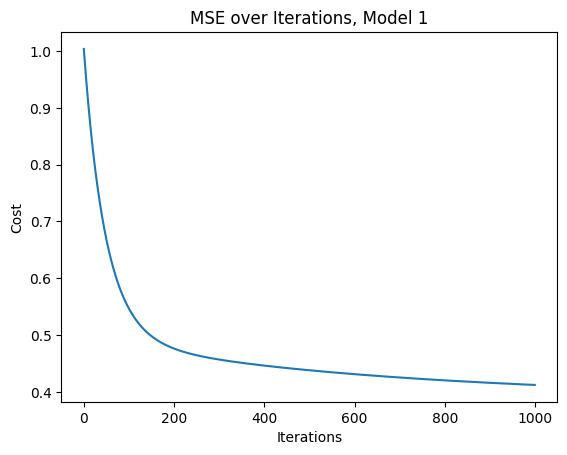

In [23]:
import matplotlib.pyplot as plt

plt.plot(cost_list1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('MSE over Iterations, Model 1')
plt.show()

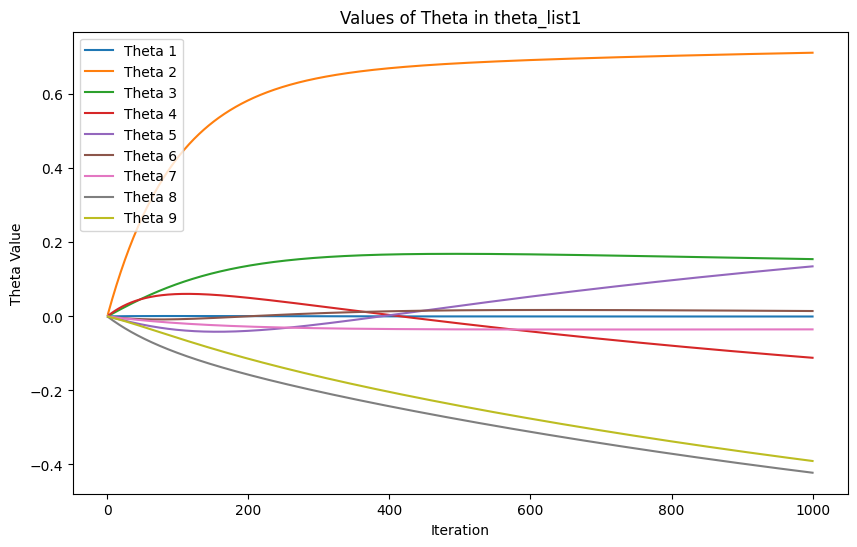

In [64]:
import matplotlib.pyplot as plt

# Convert theta_list1 to a numpy array
theta_array = np.array(theta_list1)

# Get the number of iterations
num_iterations = len(theta_array)

# Create a list of iteration numbers
iterations = list(range(1, num_iterations + 1))

# Plot the values of theta_list1
plt.figure(figsize=(10, 6))
for i in range(theta_array.shape[1]):
    plt.plot(iterations, theta_array[:, i], label=f'Theta {i+1}')

# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Theta Value')
plt.title('Values of Theta in theta_list1')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Testing the seconde custom model

In [24]:
prediction_list2, cost_list2, theta_list2 = train_model_2(X_train, y_train)
theta4 = theta_list2[-1]
error4 = evaluate_model(theta4, X_test, y_test)
print(f"Error: {error4}")

Error: 0.41632089440264575


Displaying the graph of the $MSE$ over the iterations

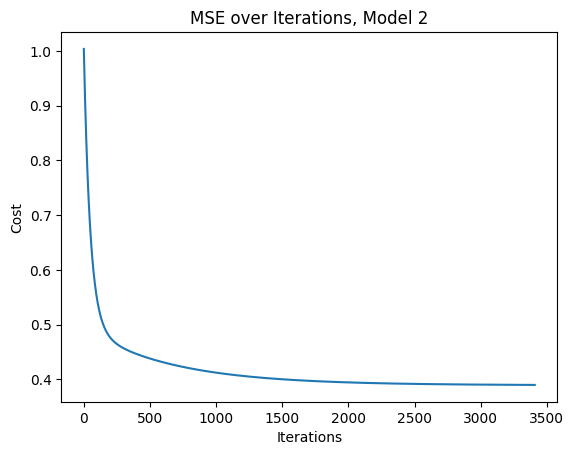

In [25]:
plt.plot(cost_list2)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("MSE over Iterations, Model 2")
plt.show()

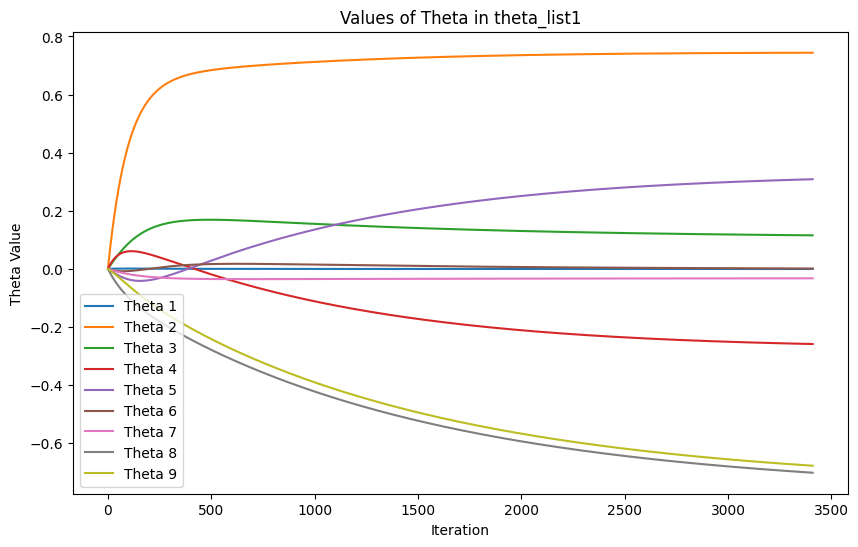

In [65]:
import matplotlib.pyplot as plt

# Convert theta_list1 to a numpy array
theta_array = np.array(theta_list2)

# Get the number of iterations
num_iterations = len(theta_array)

# Create a list of iteration numbers
iterations = list(range(1, num_iterations + 1))

# Plot the values of theta_list1
plt.figure(figsize=(10, 6))
for i in range(theta_array.shape[1]):
    plt.plot(iterations, theta_array[:, i], label=f"Theta {i+1}")

# Add labels and title to the plot
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.title("Values of Theta in theta_list1")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [27]:
import pandas as pd

# Create a dictionary with the model and error function values
data = {'Model': ['LinearRegression', "numpy", "Custom 1", "Custom 2"], 'Error Function': [error1, error2, error3, error4]}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

In [28]:
df

,Model,Error Function
0,LinearRegression,0.417477
1,numpy,0.417474
2,Custom 1,0.426108
3,Custom 2,0.416321


In [61]:
# comparing the coefficient of each model

def print_theta(theta):
    theta = [t[0] for t in theta]
    return theta

In [62]:
print(print_theta(theta2))
print(print_theta(theta3))
print(print_theta(theta4))

[-0.0006029651471098222, 0.7386720678575268, 0.10606381425755472, -0.2643937493538448, 0.32159759710792374, -0.0019896065739779235, -0.031738537828212676, -0.7769633530501958, -0.752950284353803]
[-0.00030652472394990027, 0.7124653689082554, 0.15476063288046085, -0.11181456376646572, 0.13521634440837982, 0.014502800693975814, -0.03507656870621631, -0.4224162283660612, -0.39073030797319397]
[-0.0005436280711425661, 0.7440087135125615, 0.11532015084359787, -0.2588135923607079, 0.30850504041382765, 0.001116275560755158, -0.032613568613023225, -0.7018841739940913, -0.6778213599668015]
